In [14]:
#PROBLEM 1
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing


#load data
derm_df = pd.read_csv('dermatology.csv', delimiter = '\t')

#correct column names
derm_df = derm_df.rename(columns = {"Family History":"Family Hostory"})
derm_df = derm_df.rename(columns = {"Disappearance":"Disapperance"});

#remove rows with '?'/missing value
derm_df.drop(derm_df.index[derm_df['Age'] == '?'], inplace=True)

#convert columns to numeric
derm_df = derm_df.apply(pd.to_numeric)

#preview data
derm_df.head()

,Erythema,Scathing,Definite Borders,Itching,Koebner,Polygonal,Follicular,Oral,Knee,Scalp,...,Disapperance,Vacuolisation,Spongiosis,Retes,Follicular.1,Perifollicular,Inflamatory,Band-like,Age,Disease
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [28]:
#isolating independent feature of Age
x = derm_df['Age']

#isolating class label of Disease
y = derm_df['Disease']

In [35]:
lr_model = sm.OLS(y,x).fit()
print(lr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                Disease   R-squared (uncentered):                   0.564
Model:                            OLS   Adj. R-squared (uncentered):              0.563
Method:                 Least Squares   F-statistic:                              461.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):                    2.67e-66
Time:                        00:18:52   Log-Likelihood:                         -776.45
No. Observations:                 358   AIC:                                      1555.
Df Residuals:                     357   BIC:                                      1559.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [36]:
#MODEL 2: RANDOM FOREST

#isolating independent features(clinical and histopathological attributes)
X = derm_df.iloc[0:, 0:33]

#isolating class label
y = derm_df.iloc[0:, 34]

# normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X, y.values.ravel())

predictions = rfc.predict(X)
print("RF ACCURACY:", accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))

#specified number of trees (n_estimators) as 100.

RF ACCURACY: 1.0
[[111   0   0   0   0   0]
 [  0  60   0   0   0   0]
 [  0   0  71   0   0   0]
 [  0   0   0  48   0   0]
 [  0   0   0   0  48   0]
 [  0   0   0   0   0  20]]


In [37]:
#MODEL 3: KNN

#isolating independent features(clinical and histopathological attributes)
X = derm_df.iloc[0:, 0:33]
#isolating class label
y = derm_df.iloc[0:, 34]

# normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

#create KNN Classifier model
knn = KNeighborsClassifier(n_neighbors = 9)

#fit  data
knn.fit(X, np.ravel(y))

#predicting on data
predictions = knn.predict(X)

#printing Confusion matrix and accuracy scores
print('KNN confusion matrix on test data')
print(confusion_matrix(y, predictions))

print('Accuracy on test data')
print(accuracy_score(y, predictions))

#To decide k value, I used general rule of thumb of k = sqrt(N)/2. This data set is a bit larger than what we had
#used in previous assignments (N=358). Based off this, I selected 9 as the k value. 

#Accuracy score is 96.65%

KNN confusion matrix on test data
[[109   2   0   0   0   0]
 [  0  52   0   8   0   0]
 [  0   0  70   1   0   0]
 [  0   1   0  47   0   0]
 [  0   0   0   0  48   0]
 [  0   0   0   0   0  20]]
Accuracy on test data
0.9664804469273743


In [38]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

#MODEL 4: Divisive clustering, K-Means

#isolating independent features
X = derm_df.iloc[0:, 0:33]

# normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

#will use 6 clusters since there are 6 disease types

#K-Means
#scale data
scaler = StandardScaler()
scaler.fit_transform(X)

kmeans = KMeans(n_clusters = 6)
y_means = kmeans.fit_predict(X)

centroids = kmeans.cluster_centers_
#print values for each of the 6 centroids
print(centroids)
print('KMeans', y_means)

[[-0.88690947 -0.97008443 -0.77529301  0.45664116 -0.70183421 -0.47084679
   0.14755002 -0.45429341 -0.60838523 -0.58252617 -0.37433593 -0.46880711
  -0.13810948 -0.67332089  2.39451784 -0.5045527   0.33753298  0.1686308
  -0.63612976 -0.62465179  0.74954524 -0.59804577 -0.44291707 -0.48218876
  -0.46702857 -0.54551102 -0.48081258 -0.67249987 -0.47795742 -0.18671163
  -0.23788494 -0.18961095 -0.48568554]
 [ 0.06183397  0.02630108 -0.55181257 -0.22394048 -0.11544738 -0.47084679
  -0.28009031 -0.45429341 -0.59279139 -0.51203797 -0.29050841 -0.46880711
   0.34182113  0.1164854  -0.37021107  0.67598985 -0.43435458 -0.36165817
  -0.44210603 -0.62465179 -0.76206829 -0.6096973  -0.30696207 -0.47019102
  -0.46702857 -0.34526461 -0.48081258  1.01289665 -0.46838544 -0.21333673
  -0.21928232 -0.23125865 -0.48833184]
 [ 0.00948097 -0.24760133  0.58773905  0.80536067  0.77267663  1.9032821
  -0.29602932  1.83636914 -0.6014154  -0.55160781 -0.37433593  1.8950372
   0.06394984 -0.67332089 -0.31323768

Agglomerative clustering [2 0 1 0 1 2 4 1 5 5 0 2 2 0 1 5 2 0 1 4 3 5 4 1 4 0 3 4 5 1 0 2 0 5 1 0 2
 5 0 5 4 1 5 3 2 1 1 5 0 0 4 0 2 1 5 2 3 0 4 0 2 1 0 5 4 0 2 3 1 4 5 2 2 0
 1 4 0 2 2 2 4 0 0 1 0 5 2 2 4 0 1 5 2 4 0 3 2 4 0 2 2 0 5 0 1 0 0 1 4 1 1
 4 2 1 5 0 2 4 3 0 0 2 3 1 4 5 0 0 1 4 4 0 5 2 1 0 5 0 0 5 1 1 2 4 5 2 2 0
 0 0 4 1 2 1 2 5 5 5 1 3 2 0 0 1 5 1 1 0 0 0 1 0 0 2 1 1 0 0 0 0 3 2 2 2 2
 0 1 1 1 0 0 2 1 2 2 2 4 4 4 4 4 0 0 0 0 0 0 0 1 1 1 1 1 1 5 5 5 5 4 4 4 4
 4 4 4 2 2 2 2 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 5 2 5 5 5 5 3
 3 3 5 5 5 0 0 0 0 0 5 2 5 5 5 0 0 5 5 5 1 1 1 1 0 0 0 0 4 4 4 4 4 1 1 1 5
 0 0 5 5 5 0 0 0 1 1 1 1 1 0 0 0 0 5 2 0 0 5 1 1 5 0 0 5 5 4 4 0 0 4 4 1 0
 4 4 3 3 5 2 3 3 3 0 0 0 4 4 0 0 0 0 2 2 5 5 1 1 0]


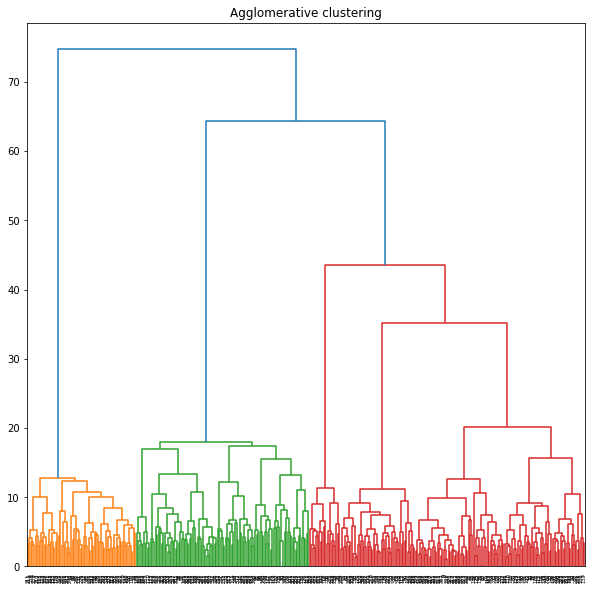

In [39]:
#Model 5: Agglomerative clustering

plt.figure(figsize = (10, 10))
plt.title('Agglomerative clustering')
#Ward
Dendrogram = sch.dendrogram((sch.linkage(X, method = 'ward')))

#will use 6 classes since there are 6 disease types

ac = AgglomerativeClustering(n_clusters = 6)
y_ac = ac.fit_predict(X)

print('Agglomerative clustering', y_ac)

In [40]:
#PROBLEM 2
#load data
hc_df = pd.read_csv('hatecrime.csv')

#preview data
hc_df.head()

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986


In [41]:
# missing values
print(hc_df.isna().sum())
#share_non_citizen(3), hate_crimes_per_100k_fbi(5), avg_hate_crimes_per_100k_fbi(1)

state                                       0
median_household_income                     0
share_unemployed_seasonal                   0
share_population_in_metro_areas             0
share_population_with_high_school_degree    0
share_non_citizen                           3
share_white_poverty                         0
gini_index                                  0
share_non_white                             0
share_voters_voted_trump                    0
hate_crimes_per_100k_splc                   4
avg_hatecrimes_per_100k_fbi                 1
dtype: int64


In [42]:
#remove rows with missing values
hc_df = hc_df.dropna()

# normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [43]:
#1. How does income inequality relate to the number of hate crimes and hate incidents? [5 points]

#using linear regression because hate crime label is continuous value
#isolating class label
y = hc_df['hate_crimes_per_100k_splc']
#isolating independent feature of Gini index score
x = hc_df[['gini_index']]
x = sm.add_constant(x)
hc_model = sm.OLS(y, x).fit()
print(hc_model.summary())

#repeating but with avg_hatecrimes_per_100k_fbi label
y = hc_df['avg_hatecrimes_per_100k_fbi']
#isolating independent feature of Gini index score
x = hc_df[['gini_index']]
x = sm.add_constant(x)
hc_model = sm.OLS(y, x).fit()
print(hc_model.summary())

#when comparing gini_index to hate_crimes_per_100k_splc and avg_hatecrimes_per_100k_fbi labels, p-value is > 0.05
#there is a statistically significant relationship between Gini index score and crime
#based off coefficient values, Gini index score and crime rate have a positive relationship
#higher income inequality leatds to higher number of hate crimes and incidents

#linear equation using gini_index to predict hate_crimes_per_100k_splc
#hate_crimes_per_100k_splc = -1.2754  + 3.1512*x

#linear equation using gini_index to predict avg_hatecrimes_per_100k_fbi
#avg_hatecrimes_per_100k_fbi = -1.5307  + 3.7675*x


                                OLS Regression Results                               
Dep. Variable:     hate_crimes_per_100k_splc   R-squared:                       0.145
Model:                                   OLS   Adj. R-squared:                  0.125
Method:                        Least Squares   F-statistic:                     7.280
Date:                       Wed, 13 Apr 2022   Prob (F-statistic):            0.00992
Time:                               00:18:56   Log-Likelihood:                 2.2752
No. Observations:                         45   AIC:                           -0.5504
Df Residuals:                             43   BIC:                             3.063
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

/Users/laurensantos/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/laurensantos/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [44]:
#2. How can we predict the number of hate crimes and hate incidents from race/nature of the population? 
#scale labels

#using linear regression because hate crime label is continuous value
#isolating class label
y = hc_df['hate_crimes_per_100k_splc']
#omitting Gini index score
X = hc_df[['median_household_income', 'share_unemployed_seasonal', 'share_population_in_metro_areas', 'share_population_with_high_school_degree', 'share_non_citizen', 'share_white_poverty', 'share_non_white', 'share_voters_voted_trump']]
X = sm.add_constant(X)
hc_model = sm.OLS(y, X).fit()
print(hc_model.summary())
#top 3 lowest p-values: share_voters_voted_trump, share_unemployed_seasonal, median_household_income

#see how this compares to avg_hatecrimes_per_100k_fbi
y = hc_df['avg_hatecrimes_per_100k_fbi']
#omitting Gini index score
X = hc_df[['median_household_income', 'share_unemployed_seasonal', 'share_population_in_metro_areas', 'share_population_with_high_school_degree', 'share_non_citizen', 'share_white_poverty', 'share_non_white', 'share_voters_voted_trump']]
X = sm.add_constant(X)
hc_model = sm.OLS(y, X).fit()
print(hc_model.summary())
#top 3 lowest p-values: share_voters_voted_trump, share_unemployed_seasonal, share_non_citizen


#linear equation using top 3 variables stated above (in listed order) to predict hate_crimes_per_100k_splc
#hate_crimes_per_100k_splc = -0.0038 - (1.3202*x1) + (3.5613*x2) - (4.89e-06*x3)

#linear equation using top 3 variables stated above to predict avg_hatecrimes_per_100k_fbi
#avg_hatecrimes_per_100k_fbi = 0.4265 - (-1.3202*x1) + (3.5613*x2) + (0.3391*x3)

                                OLS Regression Results                               
Dep. Variable:     hate_crimes_per_100k_splc   R-squared:                       0.534
Model:                                   OLS   Adj. R-squared:                  0.430
Method:                        Least Squares   F-statistic:                     5.150
Date:                       Wed, 13 Apr 2022   Prob (F-statistic):           0.000253
Time:                               00:18:56   Log-Likelihood:                 15.921
No. Observations:                         45   AIC:                            -13.84
Df Residuals:                             36   BIC:                             2.419
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

/Users/laurensantos/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/laurensantos/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


[[ 1.52230172 10.95347971]
 [ 0.21256717  1.49339421]
 [ 0.39483994  3.50397559]]
KMeans [1 1 2 1 1 2 2 1 0 1 1 1 1 1 1 1 2 1 1 2 2 2 1 2 2 1 1 2 1 2 1 2 1 2 1 1 1
 2 1 1 1 1 2 1 1]


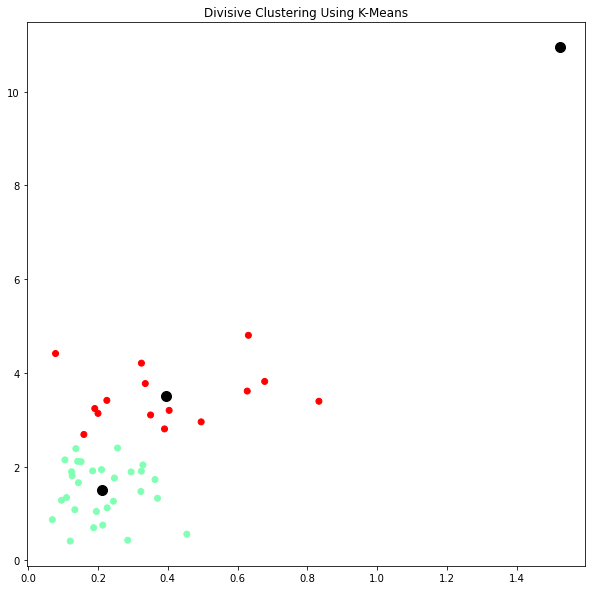

In [45]:
#3. How does the number of hate crimes vary across states? Is there any similarity in number of hate incidents (per 100,000 people) between some states than in others — both according to the SPLC after the election and the FBI before it?
#isolating class label

#add number column to refer to states
hc_df['State_Num'] = np.arange(len(hc_df))

#Clustering using K Means

#isolate and scale attributes
X = hc_df[['hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi']]
#scale data
scaler = StandardScaler()
scaler.fit_transform(X)

#K-Means
kmeans = KMeans(n_clusters = 3)
y_means = kmeans.fit_predict(X)

centroids = kmeans.cluster_centers_
#print values for each of the 3 centroids
print(centroids)
print('KMeans', y_means)

#visualization
plt.figure(figsize = (10,10))
plt.title('Divisive Clustering Using K-Means')
#visualizing 
plt.scatter(X['hate_crimes_per_100k_splc'], X['avg_hatecrimes_per_100k_fbi'], c = y_means, cmap = 'rainbow')
plt.scatter(centroids[:,0], centroids[:,1], c = 'black', s = 100)
plt.show()

#Washington DC is shown to have the highest crime rate and incident (cluster 2). 

#Colorado, Conneticut, Kansas, Maine, Maryland, Michigan, Nevada, West Virginia follow after (cluster 2)